### Implement Linear Regression and Logistic Regression
<img src="pics/bridge-2.jpg" width="800" height="400">
In this article you're going to learn about Linear Regression, Logistic Regression and Gradient Descent algorithm which is a essential component of deep learning.

### Agenda
1. How does it work?
2. Gradient Descent
3. Learning Rate
3. Implement Linear Regression on quantitative data
4. Implement Logistic Regression on qualitative data

### 1. How does it work?
Unlike KNN which needs to store whole training samples in order to predict output of unseen samples, Linear Regression and Logistic Regression do not store a single point of training sample but instead they create a linear function to approximate the training set. Below are brief procedures of how to train both of them using **Gradient Descent** (actually there is another method called **Least Square Error** but we're not going to talk about it in this course).

<img src="pics/linear_regression-2.png" width="1000">

```
1. Initial the model with random parameters
2. for _ in range(epochs):
3.    Predict output for training samples from the linear function
4.    Calculate cost from prediction outputs and training labels
5.    Update parameters by Gradient descent
```

<img src="pics/linear_regression_animation.gif">

There are several differents between Linear Regression and Logistic Regression.
1. Linear Regression outputs **continuous quantity**, Logistic Regression outputs **probability**.
2. Linear Regression uses **Mean Squared Error** or **Mean Absolute Error** as cost function, Logistic Regression uses **Binary Cross Entropy** as cost function.

In short, the obvious different between the two is that Linear Regression is for **quantitative data** and another is for **qualitative data**. the following will show how both of them work in greater detail.

### 1.1. Linear Regression
Linear Regression's equation is a simple linear function that map from N independent variables to a dependent variable.
- Simple Linear Regression
#### $$\hat{y} = w_0 + wx$$
- Multiple Linear Regression
#### $$\hat{y} = w_0 + w_1x_1 + w_2x_2 + w_nx_n$$
- Polynomial Linear Regression
#### $$\hat{y} = w_0 + w_1x_1 + w_2x_2 + w_3x_1x_2 + w_4x_1^2 + w_5x_2^2 + w_nx_n$$

<img src="pics/linear_regression-3.png" width="800" height="200">

In order for Gradient Descent algorithm to be able to train the model we need a cost function for optimizer to minimize it.
- Mean Squared Error (MSE)
#### $$MSE = \frac{1}{n}\sum_{i=1}^n{(y_i - \hat{y}_i)^2}$$

<img src="pics/MSE.png">

- Mean Absolute Error (MAE)
#### $$MAE = \frac{1}{n}\sum_{i=1}^n{|y_i - \hat{y}_i|}$$

<img src="pics/MAE.png">

### 1.2. Logistic Regression
Logistic Regression is a linear equation mapping any N independent variables into one dependent variable that is a **qualitative data**.
- Simple Logistic Regression
#### $$\hat{y} = \frac{1}{1 + e^{-z}},\quad z = w_0 + wx$$
- Multiple Logistic Regression
#### $$\hat{y} = \frac{1}{1 + e^{-z}},\quad z = w_0 + w_1x_1 + w_2x_2 + w_nx_n$$
- Polynomial Logistic Regression
#### $$\hat{y} = \frac{1}{1 + e^{-z}},\quad z = w_0 + w_1x_1 + w_2x_2 + w_3x_1x_2 + w_4x_1^2 + w_5x_2^2 + w_nx_n$$
- Multi-classes Logistic Regression
#### $$\hat{y} = \frac{e^{z_j}}{\sum_{j=0}^{k} e^{z_j}},\quad z_j = w_{0j} + w_jx$$

<img src="pics/logistic_regression-3.png" width="1400" height="200">

Since output of Logistic Regression is probability so it need different type of cost function.
- Binary Cross Entropy (BCE)
####  $$BCE = \frac{1}{n}\sum_{i=1}^n{(-y_i*log(\hat{y}_i) - (1 - y_i)*log(1 - \hat{y}_i))}$$
- Categorical Cross Entropy (CCE)
####  $$CCE = \frac{1}{n}\sum_{i=1}^n{(-y_i*log(\hat{y}_i))}$$

<img src="pics/BCE.png">

### 2. Gradient Descent
Gradient descent is an optimization algorithm used in machine learning to update model's parameters to the optimal point by minimizing some function by moving iteratively in the steepest descent direction as defined by the negative of the gradient.
- Gradient Descent Equation
#### $$W_{new} = W_{old} - \alpha*\frac{\partial J(W)}{\partial W}$$
When  
$J(W)$: Cost function  
$W$: Model parameters  
$\alpha$: Learning rate

<img src="pics/GradientDescent.png" width="500">

From the figure above the model with initialized parameters start at the **inital point**, then in each epoch the model finds which direction to update each parameter to move closer to the **optimal point** by calculating partial derivative of the cost function with respect to each parameter, and update its parameters by subtraction current value of each parameter with the derivative times learning rate.

### 3. Learning Rate
Learning rate is one of hyperparameters which used to determine how much to update parameters, too small learning rate leads to slow in training time and too big learning rate leads to oscillation or divergence.

<img src="pics/LearningRate.png" width="1000">

### 4. Implement Linear regression on quantitative data
This time we're going to use Linear Regression to predict house price instead of KNN, let see if Linear Regression can do any better than the KNN.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 4.1. Load dataset

In [2]:
# Load dataset
house_data = pd.read_csv("./datasets/housedata/data.csv")

### 4.2. Prepare data

In [3]:
# Remove columns
data = house_data.drop(columns=["date", "yr_built", "yr_renovated", "street", "statezip", "country"])
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond


In [4]:
# One-hot encoding categorical columns
categorical_cols = ["view", "condition", "city"]

for col in categorical_cols:
    city_encoded = pd.get_dummies(data[col])
    city_encoded.columns = [col + "_" + str(_col) for _col in city_encoded.columns]
    data = pd.concat([data.drop(columns=col), city_encoded], axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,view_0,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.0,3.0,1.50,1340,7912,1.5,0,1340,0,1,...,0,0,1,0,0,0,0,0,0,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,3370,280,0,...,0,1,0,0,0,0,0,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,1930,0,1,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,1000,1000,1,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,1140,800,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Seperate prediction/feature
data_x = data.drop(columns="price")
data_y = data.price
print(f"data_x: {data_x.shape}")
print(f"data_y: {data_y.shape}")

data_x: (4600, 62)
data_y: (4600,)


In [6]:
from sklearn.model_selection import train_test_split

train_x: (3680, 62)
test_x: (920, 62)
train_y: (3680,)
test_y: (920,)


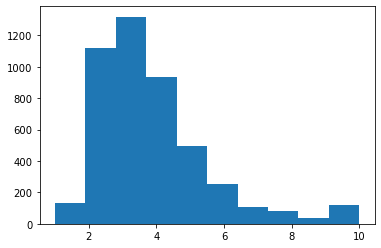

In [7]:
# Split train/test
# Group y into bins
bins = np.linspace(0, 1500000, 10)
y_binned = np.digitize(data_y, bins)
plt.hist(y_binned)

# Split with stratify
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=42, shuffle=True, stratify=y_binned)
print(f"train_x: {train_x.shape}")
print(f"test_x: {test_x.shape}")
print(f"train_y: {train_y.shape}")
print(f"test_y: {test_y.shape}")

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
# Normalize all features to have mean of 0 and standard deviation of 1
scaler_x = StandardScaler()

scaler_x.fit(train_x)

train_x_scaled = scaler_x.transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=train_x.columns)
train_x_scaled.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,view_0,view_1,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
count,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,...,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03,3.680000e+03
mean,9.654113e-18,-2.664535e-16,1.428809e-16,-3.861645e-18,-1.670162e-16,-1.737740e-17,2.510069e-17,1.641199e-17,-1.110223e-16,-4.923598e-17,...,9.171408e-18,-5.647656e-17,1.930823e-17,1.061952e-17,7.916373e-17,1.061952e-17,-1.834282e-17,-2.316987e-17,-1.544658e-17,1.061952e-17
std,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,...,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00,1.000136e+00
min,-3.732891e+00,-2.747640e+00,-1.827296e+00,-4.225101e-01,-9.559976e-01,-8.102192e-02,-1.686014e+00,-6.692456e-01,-2.990977e+00,-1.197204e-01,...,-8.597200e-02,-7.272373e-01,-1.627861e-01,-2.331896e-02,-1.287423e-01,-1.648675e-02,-8.270396e-02,-8.102192e-02,-1.645366e-01,-2.331896e-02
25%,-4.375834e-01,-5.225785e-01,-6.964308e-01,-2.898747e-01,-9.559976e-01,-8.102192e-02,-7.330443e-01,-6.692456e-01,3.343389e-01,-1.197204e-01,...,-8.597200e-02,-7.272373e-01,-1.627861e-01,-2.331896e-02,-1.287423e-01,-1.648675e-02,-8.270396e-02,-8.102192e-02,-1.645366e-01,-2.331896e-02
50%,-4.375834e-01,1.131534e-01,-1.673104e-01,-2.092657e-01,-3.286163e-02,-8.102192e-02,-2.798025e-01,-6.692456e-01,3.343389e-01,-1.197204e-01,...,-8.597200e-02,-7.272373e-01,-1.627861e-01,-2.331896e-02,-1.287423e-01,-1.648675e-02,-8.270396e-02,-8.102192e-02,-1.645366e-01,-2.331896e-02
75%,6.608524e-01,4.310193e-01,4.966839e-01,-1.094699e-01,8.902743e-01,-8.102192e-02,5.453298e-01,6.239690e-01,3.343389e-01,-1.197204e-01,...,-8.597200e-02,1.375067e+00,-1.627861e-01,-2.331896e-02,-1.287423e-01,-1.648675e-02,-8.270396e-02,-8.102192e-02,-1.645366e-01,-2.331896e-02
max,6.153032e+00,7.424070e+00,1.183646e+01,1.905516e+01,3.659682e+00,1.234234e+01,8.819897e+00,9.719578e+00,3.343389e-01,8.352798e+00,...,1.163169e+01,1.375067e+00,6.143032e+00,4.288356e+01,7.767453e+00,6.065476e+01,1.209132e+01,1.234234e+01,6.077676e+00,4.288356e+01


In [10]:
# Normalize all features to have mean of 0 and standard deviation of 1
test_x_scaled = scaler_x.transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=test_x.columns)
test_x_scaled.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,view_0,view_1,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,...,920.000000,920.000000,920.000000,920.000000,920.000000,9.200000e+02,920.000000,920.000000,920.000000,920.000000
mean,0.013730,-0.001209,0.041928,0.048555,-0.052930,0.040511,0.037795,0.017009,0.009036,0.036837,...,-0.060499,-0.041703,0.029130,0.023319,-0.034331,-1.648675e-02,-0.029773,-0.013504,-0.042406,0.069957
std,0.991444,0.982609,0.995879,1.397089,0.967554,1.223398,1.009287,1.001793,0.988420,1.141640,...,0.546042,0.986053,1.083805,1.414598,0.858706,6.942668e-18,0.801420,0.913867,0.865020,1.999455
min,-3.732891,-2.747640,-1.671672,-0.421203,-0.955998,-0.081022,-1.511690,-0.669246,-2.990977,-0.119720,...,-0.085972,-0.727237,-0.162786,-0.023319,-0.128742,-1.648675e-02,-0.082704,-0.081022,-0.164537,-0.023319
25%,-0.437583,-0.522579,-0.665306,-0.277712,-0.955998,-0.081022,-0.735950,-0.669246,0.334339,-0.119720,...,-0.085972,-0.727237,-0.162786,-0.023319,-0.128742,-1.648675e-02,-0.082704,-0.081022,-0.164537,-0.023319
50%,-0.437583,0.113153,-0.130998,-0.206088,-0.032862,-0.081022,-0.221695,-0.669246,0.334339,-0.119720,...,-0.085972,-0.727237,-0.162786,-0.023319,-0.128742,-1.648675e-02,-0.082704,-0.081022,-0.164537,-0.023319
75%,0.660852,0.431019,0.548558,-0.100241,0.890274,-0.081022,0.615059,0.688630,0.334339,-0.119720,...,-0.085972,1.375067,-0.162786,-0.023319,-0.128742,-1.648675e-02,-0.082704,-0.081022,-0.164537,-0.023319
max,3.956160,4.245411,5.030520,32.221854,2.736546,12.342339,4.078291,4.029434,0.334339,8.352798,...,11.631694,1.375067,6.143032,42.883563,7.767453,-1.648675e-02,12.091319,12.342339,6.077676,42.883563


In [11]:
# Convert type to numpy array
train_x_scaled = train_x_scaled.to_numpy()
train_x, train_y = train_x.to_numpy(), train_y.to_numpy()

test_x_scaled = test_x_scaled.to_numpy()
test_x, test_y = test_x.to_numpy(), test_y.to_numpy()

### 4.3. Prepare model
- Implement Linear Regression in matrix form
#### $$\hat{Y} = XW + B$$

#### $$\hat{Y} =
\begin{bmatrix}
x_{11} & x_{12} & x_{13} & x_{1m} \\
x_{21} & x_{22} & x_{23} & x_{2m} \\
x_{n1} & x_{n2} & x_{n3} & x_{nm} \\
\end{bmatrix}
\begin{bmatrix}
w_{11} \\
w_{21} \\
w_{31} \\
w_{m1} \\
\end{bmatrix} + b
$$

#### $$\hat{Y} =
\begin{bmatrix}
x_{11}w_{11} + x_{12}w_{21} + x_{13}w_{31} + x_{1m}w_{m1} \\
x_{21}w_{11} + x_{22}w_{21} + x_{23}w_{31} + x_{2m}w_{m1} \\
x_{n1}w_{11} + x_{n2}w_{21} + x_{n3}w_{31} + x_{nm}w_{m1} \\
\end{bmatrix} + b
$$

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, Model

In [13]:
class LinearLayer(layers.Layer):
    def build(self, input_shape):
        # w shape: (feature_size, 1)
        self.w = self.add_weight(name="W",
                                 shape=(input_shape[-1], 1),
                                 initializer=tf.random_normal_initializer(),
                                 trainable=True,
                                 dtype="float32")
        # b shape: (1, )
        self.b = self.add_weight(name="B",
                                 shape=(1, ),
                                 initializer=tf.random_normal_initializer(),
                                 trainable=True,
                                 dtype="float32")
    
    def call(self, inp):
        """
        inp shape: (batch_size, feature_size)
        out shape: (batch_size, 1)
        """
        out = tf.matmul(inp, self.w) + self.b
        return out
    
class LinearRegression(Model):
    def __init__(self):
        super().__init__()
        self.linear_layer = LinearLayer()
        
    def call(self, inp):
        out = self.linear_layer(inp)
        return out

Train on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 0s 424us/sample - loss: 2186351809.5900 - mean_absolute_error: 27430.7383
Epoch 2/10
1000/1000 [==============================] - 0s 70us/sample - loss: 372408.5038 - mean_absolute_error: 355.7769
Epoch 3/10
1000/1000 [==============================] - 0s 66us/sample - loss: 62.2695 - mean_absolute_error: 4.7381
Epoch 4/10
1000/1000 [==============================] - 0s 63us/sample - loss: 0.1321 - mean_absolute_error: 0.3025
Epoch 5/10
1000/1000 [==============================] - 0s 74us/sample - loss: 0.1228 - mean_absolute_error: 0.2920
Epoch 6/10
1000/1000 [==============================] - 0s 63us/sample - loss: 0.1229 - mean_absolute_error: 0.2921
Epoch 7/10
1000/1000 [==============================] - 0s 59us/sample - loss: 0.1228 - mean_absolute_error: 0.2927
Epoch 8/10
1000/1000 [==============================] - 0s 60us/sample - loss: 0.1228 - mean_absolute_error: 0.2920
Epoch 9/10
1000/1000 [======

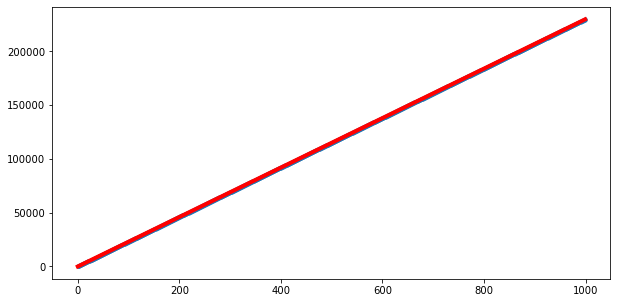

In [14]:
# Test fit model on dummy data
target_slope = 230
target_bias = 1
dummy_x = np.arange(1000).astype(np.float32).reshape(-1, 1)
dummy_y = (dummy_x * target_slope + target_bias).astype(np.float32).reshape(-1)

# Define model
regression_model = LinearRegression()
# Define loss function
loss = tf.keras.losses.MeanSquaredError()
# Define metrics function
metrics = tf.keras.metrics.MeanAbsoluteError()
# Define optimizer
# optimizer = tf.keras.optimizers.Adam(learning_rate=100)
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-7)

# Compile model
regression_model.compile(optimizer=optimizer, loss=loss, metrics=[metrics])

# Train model
regression_model.fit(dummy_x, dummy_y, batch_size=16, epochs=10)

# Check trained parameters
slope, bias = regression_model.trainable_variables
print(f"slope: {slope.numpy().squeeze()} ({target_slope})")
print(f"bias: {bias.numpy().squeeze()} ({target_bias})")

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(dummy_x, dummy_y, s=10)
plt.plot(dummy_x, regression_model.predict(dummy_x), "r", linewidth=4)
plt.show()

### 4.4. Fit and evaluate model
### 4.4.1. Split validation

<img src="pics/split_validation.png" width="900">

Train on 2944 samples, validate on 736 samples
Epoch 1/10
2944/2944 [==============================] - 0s 163us/sample - loss: 362311661657.0435 - mean_absolute_error: 464926.5625 - val_loss: 1156029891806.6086 - val_mean_absolute_error: 419073.6562
Epoch 2/10
2944/2944 [==============================] - 0s 79us/sample - loss: 218659167677.2174 - mean_absolute_error: 330273.0938 - val_loss: 1074722256361.7391 - val_mean_absolute_error: 313257.2500
Epoch 3/10
2944/2944 [==============================] - 0s 96us/sample - loss: 159270738487.6522 - mean_absolute_error: 245804.0000 - val_loss: 1035463046811.8260 - val_mean_absolute_error: 246638.1250
Epoch 4/10
2944/2944 [==============================] - 0s 80us/sample - loss: 131378726728.3478 - mean_absolute_error: 194440.4062 - val_loss: 1014688309248.0000 - val_mean_absolute_error: 207125.3906
Epoch 5/10
2944/2944 [==============================] - 0s 76us/sample - loss: 117850319437.9131 - mean_absolute_error: 164542.2656 - val_loss: 

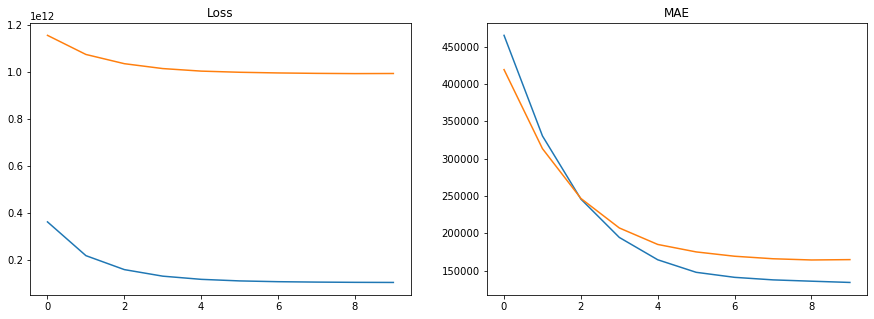

In [15]:
# Test fit model on training data and evaluate using split validation

# Define model
regression_model = LinearRegression()
# Define loss function
loss = tf.keras.losses.MeanSquaredError()
# Define metrics function
metrics = tf.keras.metrics.MeanAbsoluteError()
# Define optimizer
# optimizer = tf.keras.optimizers.Adam(learning_rate=600)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

# Compile model
regression_model.compile(optimizer=optimizer, loss=loss, metrics=[metrics])

# Train model
history = regression_model.fit(train_x_scaled, train_y, batch_size=16, epochs=10, validation_split=0.2, verbose=1)
train_loss = history.history["loss"]
train_mae = history.history["mean_absolute_error"]
val_loss = history.history["val_loss"]
val_mae = history.history["val_mean_absolute_error"]
print(f"train_mae: {train_mae[-1]}")
print(f"val_mae: {val_mae[-1]}")

# Plot
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss)
plt.plot(val_loss)
plt.title("Loss")
plt.subplot(1, 2, 2)
plt.plot(train_mae)
plt.plot(val_mae)
plt.title("MAE")
plt.show()

### 4.4.2. K-fold cross validation

<img src="pics/k-fold_cross_validation.png" width="1100">

In [16]:
from sklearn.model_selection import KFold

In [17]:
# Test fit model on training data and evaluate using cross validation
class CrossValidation:
    def __init__(self, k_folds=10, scaler=None):
        # Initial properties
        self.k_folds = k_folds
        self.scaler = scaler
        self.scores = []
        
    def eval(self, model, x, y, **kwargs):
        # Initial model params
        model(x.astype(np.float32))
        # Save initial weights
        model.save_weights("init_weights/model")
        
        # Divide training set into k folds
        kf = KFold(n_splits=self.k_folds)
        self.scores = []
        for i, (train_index, val_index) in enumerate(kf.split(x)):
            # Load initial weights
            model.load_weights("init_weights/model")
            
            # Get validation fold
            val_x, val_y = x[val_index], y[val_index]
            
            # Get training fold
            train_x, train_y = x[train_index], y[train_index]
            
            # Normalization
            if scaler is not None:
                train_x = scaler.fit_transform(train_x)
                val_x = scaler.transform(val_x)
                
            # Train model on training set
            model.fit(train_x, train_y, **kwargs)
            
            # Evaluate model on validation set
            test_loss, test_mae = model.evaluate(val_x, val_y, verbose=0)
            
            # Save evaluation result
            self.scores.append(test_mae)
        # Average all evaluation results
        mean_score = np.mean(self.scores)
        return mean_score

In [18]:
# Define model
regression_model = LinearRegression()
# Define loss function
loss = tf.keras.losses.MeanSquaredError()
# Define metrics function
metrics = tf.keras.metrics.MeanAbsoluteError()
# Define optimizer
# optimizer = tf.keras.optimizers.Adam(learning_rate=600)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

# Compile model
regression_model.compile(optimizer=optimizer, loss=loss, metrics=[metrics])

scaler = StandardScaler()
evaluator = CrossValidation(k_folds=10, scaler=scaler)

score = evaluator.eval(regression_model, train_x, train_y, batch_size=16, epochs=10, verbose=0)
print(f"Validation errors: {evaluator.scores}")
print(f"Validation mean error: {score}")

Validation errors: [136617.55, 129932.03, 162139.45, 131524.3, 142498.34, 138118.44, 150053.27, 126069.77, 187081.88, 142649.02]
Validation mean error: 144668.40625


### 4.5. Evaluate on test set

In [19]:
# Define model
regression_model = LinearRegression()
# Define loss function
loss = tf.keras.losses.MeanSquaredError()
# Define metrics function
metrics = tf.keras.metrics.MeanAbsoluteError()
# Define optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

# Compile model
regression_model.compile(optimizer=optimizer, loss=loss, metrics=[metrics])

history = regression_model.fit(train_x_scaled, train_y, batch_size=16, epochs=10, verbose=0)

test_loss, test_mae = regression_model.evaluate(test_x_scaled, test_y, verbose=0)
print(f"Test error: {test_mae}")

Test error: 133047.34375


### 5. Implement Logistic regression on qualitative data
Now let's using Logistic Regression to predict iris flow species.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 5.1. Load data

In [21]:
# Load dataset
iris_data = pd.read_csv("./datasets/Iris/Iris.csv")

### 5.2. Prepare data

In [22]:
# Remove Id column
data = iris_data.drop(columns=["Id"])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
# One-hot encoding categorical columns
categorical_cols = ["Species"]

for col in categorical_cols:
    city_encoded = pd.get_dummies(data[col])
    city_encoded.columns = [col + "_" + str(_col) for _col in city_encoded.columns]
    data = pd.concat([data.drop(columns=col), city_encoded], axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [24]:
# Seperate prediction/feature
data_x = data.iloc[:, :4]
data_y = data.iloc[:, 4:]
print(f"data_x: {data_x.shape}")
print(f"data_y: {data_y.shape}")

data_x: (150, 4)
data_y: (150, 3)


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Split train/test
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=42, shuffle=True, stratify=data_y)
print(f"train_x: {train_x.shape}")
print(f"test_x: {test_x.shape}")
print(f"train_y: {train_y.shape}")
print(f"test_y: {test_y.shape}")

train_x: (120, 4)
test_x: (30, 4)
train_y: (120, 3)
test_y: (30, 3)


In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
# Normalize all features to have mean of 0 and standard deviation of 1
scaler_x = StandardScaler()

scaler_x.fit(train_x)

train_x_scaled = scaler_x.transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=train_x.columns)
train_x_scaled.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,-1.887379e-16,4.662937e-16,-1.572816e-16,-1.850372e-17
std,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00
min,-1.926126e+00,-2.430561e+00,-1.586251e+00,-1.449345e+00
25%,-9.303903e-01,-5.932865e-01,-1.240683e+00,-1.185227e+00
50%,-5.912179e-02,-1.339679e-01,2.855731e-01,1.353602e-01
75%,6.876798e-01,6.124248e-01,7.751270e-01,7.956540e-01
max,2.554684e+00,3.081262e+00,1.696640e+00,1.720065e+00


In [29]:
# Normalize all features to have mean of 0 and standard deviation of 1
test_x_scaled = scaler_x.transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=test_x.columns)
test_x_scaled.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,30.000000,30.000000,30.000000,30.000000
mean,-0.025931,-0.049760,0.012959,0.007703
std,1.148661,0.977127,1.080642,1.039533
min,-1.801659,-1.741583,-1.413467,-1.449345
25%,-1.054857,-0.593286,-1.298278,-1.185227
50%,-0.059122,-0.133968,0.429560,0.267419
75%,0.781030,0.325351,0.775127,0.795654
max,2.305750,2.392284,1.811829,1.588007


In [30]:
# Convert type to numpy array
train_x_scaled = train_x_scaled.to_numpy()
train_x, train_y = train_x.to_numpy(), train_y.to_numpy()

test_x_scaled = test_x_scaled.to_numpy()
test_x, test_y = test_x.to_numpy(), test_y.to_numpy()

### 5.3. Prepare model
- Implement Logistic Regression in matrix form
#### $$\hat{Y} = \frac{1}{1 + e^{-Z}},\quad Z = XW + B$$
- Implement Multi-classes Logistic Regression in matrix form
#### $$\hat{Y} = \frac{e^{Z_j}}{\sum_{j=0}^{k} e^{Z_j}},\quad Z = XW + B$$

In [31]:
import tensorflow as tf
from tensorflow.keras import layers, Model

In [70]:
class LinearLayer(layers.Layer):
    def __init__(self, class_nums):
        super().__init__()
        self.class_nums = class_nums
    
    def build(self, input_shape):
        # w shape: (feature_size, 1)
        self.w = self.add_weight(name="W",
                                 shape=(input_shape[-1], self.class_nums),
                                 initializer=tf.random_normal_initializer(),
                                 trainable=True,
                                 dtype="float32")
        # b shape: (1, )
        self.b = self.add_weight(name="B",
                                 shape=(self.class_nums, ),
                                 initializer=tf.random_normal_initializer(),
                                 trainable=True,
                                 dtype="float32")
    
    def call(self, inp):
        """
        inp shape: (batch_size, feature_size)
        out shape: (batch_size, 1)
        """
        out = tf.matmul(inp, self.w) + self.b
        return out
    
class LogisticRegression(Model):
    def __init__(self, class_nums):
        super().__init__()
        self.class_nums = class_nums
        self.linear_layer = LinearLayer(class_nums)
        
    def _sigmoid(self, z):
        return 1 / (1 + tf.exp(-z))
    
    def _softmax(self, z):
        return tf.exp(z) / tf.reduce_sum(tf.exp(z), axis=-1, keepdims=True)
        
    def call(self, inp):
        out = self.linear_layer(inp)
        if self.class_nums > 1:
            out = self._softmax(out)
        else:
            out = self._sigmoid(out)
        return out

Train on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 0s 459us/sample - loss: 0.2059 - binary_accuracy: 0.9660
Epoch 2/10
1000/1000 [==============================] - 0s 65us/sample - loss: 0.0458 - binary_accuracy: 0.9980
Epoch 3/10
1000/1000 [==============================] - 0s 63us/sample - loss: 0.0385 - binary_accuracy: 0.9980
Epoch 4/10
1000/1000 [==============================] - 0s 64us/sample - loss: 0.0345 - binary_accuracy: 0.9990
Epoch 5/10
1000/1000 [==============================] - 0s 62us/sample - loss: 0.0317 - binary_accuracy: 0.9990
Epoch 6/10
1000/1000 [==============================] - 0s 60us/sample - loss: 0.0296 - binary_accuracy: 0.9990
Epoch 7/10
1000/1000 [==============================] - 0s 67us/sample - loss: 0.0280 - binary_accuracy: 0.9990
Epoch 8/10
1000/1000 [==============================] - 0s 74us/sample - loss: 0.0267 - binary_accuracy: 0.9990
Epoch 9/10
1000/1000 [==============================] - 0s 66us/sample - loss: 0.

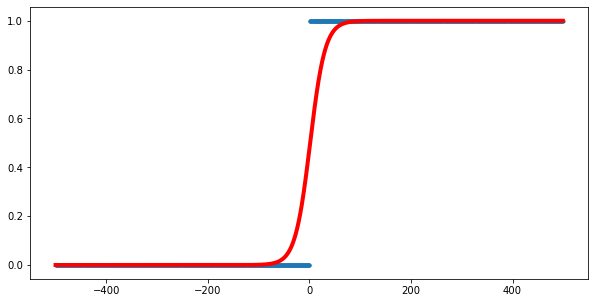

In [87]:
# Test fit model on dummy data
dummy_x = np.arange(-500, 500).astype(np.float32).reshape(-1, 1)
dummy_y = (dummy_x > 0).astype(np.float32).reshape(-1)

# Define model
classifier_model = LogisticRegression(class_nums=1)
# Define loss function
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
# Define metrics function
metrics = tf.keras.metrics.BinaryAccuracy(threshold=0.5)
# Define optimizer
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4)

# Compile model
classifier_model.compile(optimizer=optimizer, loss=loss, metrics=[metrics])

# Train model
classifier_model.fit(dummy_x, dummy_y, batch_size=16, epochs=10)

# Check trained parameters
w, b = classifier_model.trainable_variables
print(f"w: {w.numpy()}")
print(f"b: {b.numpy()}")

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(dummy_x, dummy_y, s=10)
plt.plot(dummy_x, classifier_model.predict(dummy_x), "r", linewidth=4)
plt.show()

### 5.4. Fit and evaluate model

In [76]:
# Define model
classifier_model = LogisticRegression(class_nums=3)
# Define loss function
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
# Define metrics function
metrics = tf.keras.metrics.CategoricalAccuracy()
# Define optimizer
# optimizer = tf.keras.optimizers.Adam(learning_rate=1)
optimizer = tf.keras.optimizers.SGD(learning_rate=1)

# Compile model
classifier_model.compile(optimizer=optimizer, loss=loss, metrics=[metrics])

scaler = StandardScaler()
evaluator = CrossValidation(k_folds=10, scaler=scaler)

score = evaluator.eval(classifier_model, train_x, train_y, batch_size=16, epochs=10, verbose=0)
print(f"Validation errors: {evaluator.scores}")
print(f"Validation mean error: {score}")

Validation errors: [1.0, 0.9166667, 1.0, 0.8333333, 1.0, 0.9166667, 1.0, 1.0, 1.0, 0.9166667]
Validation mean error: 0.9583333730697632


### 5.5. Evaluate on test set

In [78]:
# Define model
classifier_model = LogisticRegression(class_nums=3)
# Define loss function
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
# Define metrics function
metrics = tf.keras.metrics.CategoricalAccuracy()
# Define optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=1)

# Compile model
classifier_model.compile(optimizer=optimizer, loss=loss, metrics=[metrics])

history = classifier_model.fit(train_x_scaled, train_y, batch_size=16, epochs=10, verbose=0)

test_loss, test_acc = classifier_model.evaluate(test_x_scaled, test_y, verbose=0)
print(f"Test error: {test_acc}")

Test error: 0.9666666388511658
